# PREPROCESSING THE PRICE AND PROFIT ATTRIBUTES 

### 1.lest start by the "PrixUnitaireTTC"

Analyzing the reliability of the "PrixUnitaireTTC" column by focusing on potential outliers (values under 10).

Replacing the corrupted values (i.e., those under 10) with the mean of each "FamilleArticle" for each year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import datetime as dt
import re

from sklearn.ensemble import IsolationForest


In [2]:
# Load the dataset
df = pd.read_csv("./DATA/Prepocessing1_data.csv")
df.head()

,CleEffet,Date,TypeEffet,FamilleArticle,Reference Produit,NLot,Produit_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement
0,1,2012-08-14,Bon d'entrée,produit insecticide,0305,CHA110501,0,65.0,1650.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0
1,1,2012-08-14,Bon d'entrée,matériel bovin,0305,10.274.1.09,1,120.0,550.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0
2,1,2012-08-14,Bon d'entrée,produit insecticide,0305,L110703,2,137.0,1034.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0
3,1,2012-08-14,Bon d'entrée,produit insecticide,2F18272093,2F18272093,3,2000.0,2800.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0
4,1,2012-08-14,Bon d'entrée,produit insecticide,0305,20101102,4,3500.0,1550.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261001 entries, 0 to 261000
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CleEffet             261001 non-null  int64  
 1   Date                 261001 non-null  object 
 2   TypeEffet            261001 non-null  object 
 3   FamilleArticle       261001 non-null  object 
 4   Reference Produit    261001 non-null  object 
 5   NLot                 261001 non-null  object 
 6   Produit_Designation  261001 non-null  int64  
 7   Quantite             261001 non-null  float64
 8   PrixAchat            261001 non-null  float64
 9   PrixUnitaireTTC      261001 non-null  float64
 10  DetailEffet_Marge    261001 non-null  float64
 11  Effet_Marge          261001 non-null  float64
 12  MontantHT            261001 non-null  float64
 13  Payement             261001 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 27.9+ MB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261001 entries, 0 to 261000
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CleEffet             261001 non-null  int64         
 1   Date                 261001 non-null  datetime64[ns]
 2   TypeEffet            261001 non-null  object        
 3   FamilleArticle       261001 non-null  object        
 4   Reference Produit    261001 non-null  object        
 5   NLot                 261001 non-null  object        
 6   Produit_Designation  261001 non-null  int64         
 7   Quantite             261001 non-null  float64       
 8   PrixAchat            261001 non-null  float64       
 9   PrixUnitaireTTC      261001 non-null  float64       
 10  DetailEffet_Marge    261001 non-null  float64       
 11  Effet_Marge          261001 non-null  float64       
 12  MontantHT            261001 non-null  float64       
 13  Payement      

In [6]:
# Check the distribution of PrixUnitaireTTC
df['PrixUnitaireTTC'].describe() 

count    2.610010e+05
mean     9.224041e+05
std      4.697753e+08
min      0.000000e+00
25%      2.500000e+02
50%      9.000000e+02
75%      3.000000e+03
max      2.400000e+11
Name: PrixUnitaireTTC, dtype: float64

LETS IDENTIFY THE OUTLIERS WE WILL CONSIDER THE VALUSE 1-9.99 AS OUTLIERS+

1.THE VALUES BETWEEN 1 AND 9.99

In [7]:
# Select rows where PrixUnitaireTTC less than 10 
prixUnitaireFalse = df[(df['PrixUnitaireTTC'] <10) ]

# Display the resulting DataFrame
print(prixUnitaireFalse.shape)

(4082, 14)


4082 ROWS HAVE PRIX UNITAIRE LESS THAN 10.

we check the families that are more affected 

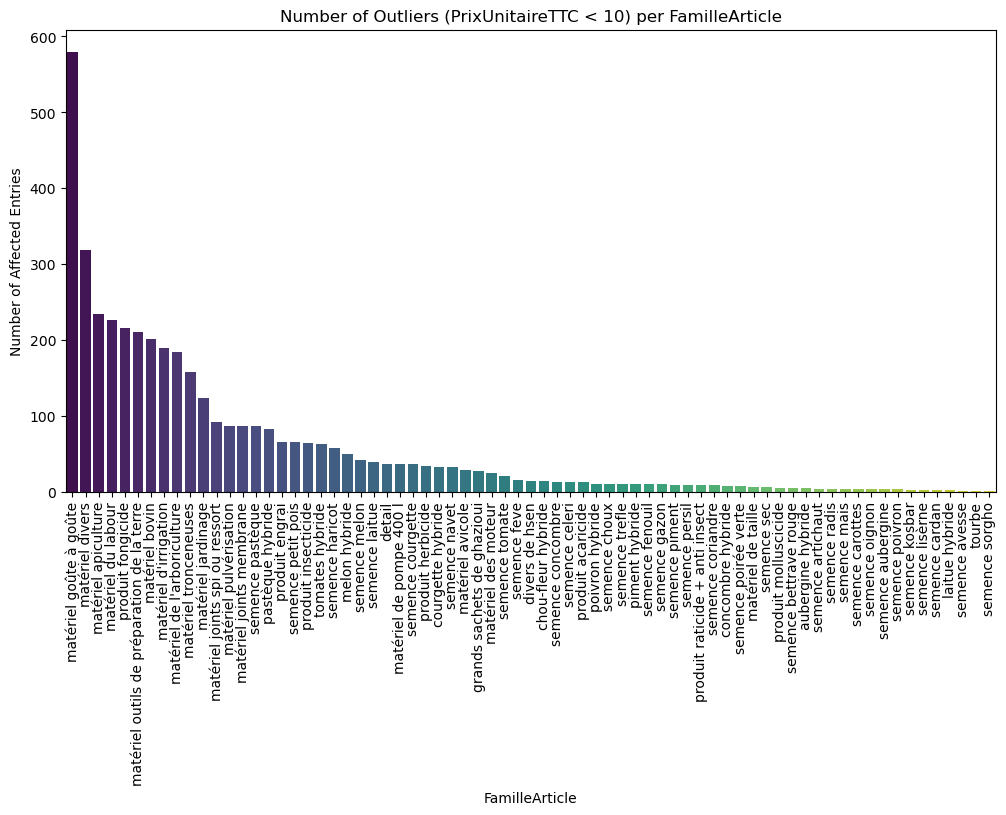

In [8]:


# Count occurrences of each FamilleArticle in the affected dataset
famille_counts = prixUnitaireFalse['FamilleArticle'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=famille_counts.index, y=famille_counts.values, palette='viridis')

# Labels and title
plt.xticks(rotation=90)
plt.xlabel('FamilleArticle')
plt.ylabel('Number of Affected Entries')
plt.title('Number of Outliers (PrixUnitaireTTC < 10) per FamilleArticle')

# Show plot
plt.show()


we calculate the percentage of affected rows for each TypeEffet

In [9]:
# Count total rows for each TypeEffet
total_counts = df['TypeEffet'].value_counts()

# Count affected rows where PrixUnitaireTTC < 10 for each TypeEffet
affected_counts = prixUnitaireFalse['TypeEffet'].value_counts()

# Calculate percentage of affected rows
percentage_affected = (affected_counts / total_counts * 100).round(2)

# Convert to DataFrame for better visualization
percentage_df = pd.DataFrame({'Total Rows': total_counts, 'Affected Rows': affected_counts, 'Percentage (%)': percentage_affected})

# Display result
print(percentage_df)


                  Total Rows  Affected Rows  Percentage (%)
TypeEffet                                                  
Bon d'entrée            8309           2633           31.69
Bon de livraison      223143            518            0.23
Bon de réception       18098            214            1.18
Bon de sortie          11451            717            6.26


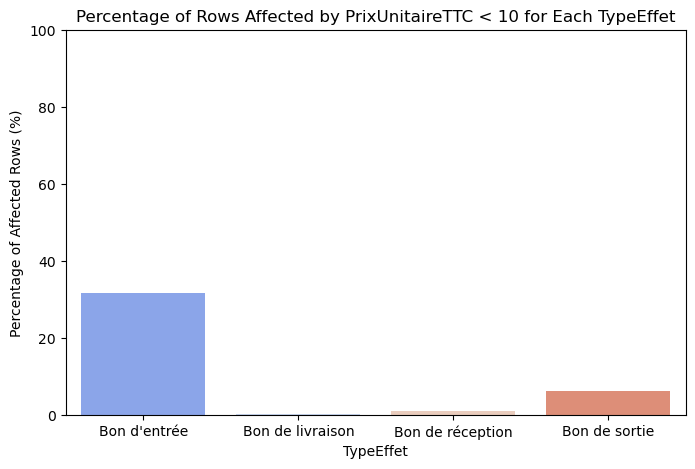

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x=percentage_affected.index, y=percentage_affected.values, palette='coolwarm')

plt.xlabel('TypeEffet')
plt.ylabel('Percentage of Affected Rows (%)')
plt.title('Percentage of Rows Affected by PrixUnitaireTTC < 10 for Each TypeEffet')
plt.ylim(0, 100)  # Keep y-axis in percentage range

plt.show()


type bon de livraison seem to have less affected rows

### we replace the affected rows where PrixUnitaireTTC is less than 10 with the mean PrixUnitaireTTC for each FamilleArticle over the years

In [11]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Iterate over the years from 2012 to 2022
for year in range(2012, 2023):
    # Iterate through unique famille_article values
    for famille_article in df['FamilleArticle'].unique():
        # Filter rows for the specified family, year, and PrixUnitaireTTC less than 9.9
        rows_to_update = df[(df['FamilleArticle'] == famille_article) & (df['Year'] == year) & (df['PrixUnitaireTTC'] < 10)]

        if not rows_to_update.empty:
            # Calculate the mean for the specific year for rows with PrixUnitaireTTC >= 9
            mean_prix_unitaire = df[(df['FamilleArticle'] == famille_article) & (df['Year'] == year) & (df['PrixUnitaireTTC'] > 10)]['PrixUnitaireTTC'].mean()

            # Round the mean to keep zeros after the decimal point
            mean_prix_unitaire_rounded = round(mean_prix_unitaire, 1)

            # Update the 'PrixUnitaireTTC' values directly using boolean indexing
            df.loc[rows_to_update.index, 'PrixUnitaireTTC'] = mean_prix_unitaire_rounded
# Display the result
df.head()


,CleEffet,Date,TypeEffet,FamilleArticle,Reference Produit,NLot,Produit_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Year
0,1,2012-08-14,Bon d'entrée,produit insecticide,0305,CHA110501,0,65.0,1650.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012
1,1,2012-08-14,Bon d'entrée,matériel bovin,0305,10.274.1.09,1,120.0,550.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012
2,1,2012-08-14,Bon d'entrée,produit insecticide,0305,L110703,2,137.0,1034.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012
3,1,2012-08-14,Bon d'entrée,produit insecticide,2F18272093,2F18272093,3,2000.0,2800.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012
4,1,2012-08-14,Bon d'entrée,produit insecticide,0305,20101102,4,3500.0,1550.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012


WE CHECK IF THE AFFECTED WERE successfully REPLACED 

In [12]:
print(df[df['PrixUnitaireTTC']<10])

Empty DataFrame
Columns: [CleEffet, Date, TypeEffet, FamilleArticle, Reference Produit, NLot, Produit_Designation, Quantite, PrixAchat, PrixUnitaireTTC, DetailEffet_Marge, Effet_Marge, MontantHT, Payement, Year]
Index: []


NOW THE COLUMN PrixUnitaireTTC IS RELIABLE 

### 2. NOW WE TREAT THE COLUMN MontantHT

Calculate Correct MontantHT USING CalculatedAmount=PrixUnitaireTTC*Quantite AND THEN WE COMPARE IT TO THE ACTUAL VALUES IN MontantHT to identify discrepancies (violations).

In [13]:
def compute_transaction_total(df):
    # Compute the total amount for each row
    df['CalculatedAmount'] = df['PrixUnitaireTTC'] * df['Quantite']

    # Aggregate by CleEffet and sum up the calculated amounts
    aggregated_amount = df.groupby('CleEffet')['CalculatedAmount'].sum().reset_index()

    return aggregated_amount

# Calculate the aggregated total amount per transaction
aggregated_amount_per_transaction = compute_transaction_total(df)

# Merge the aggregated values back into the original dataframe using CleEffet
df = pd.merge(df, aggregated_amount_per_transaction, on='CleEffet', how='left')

# Check if the calculated amount matches the actual MontantHT
aggregated_amount_per_transaction['Amount_Match'] = aggregated_amount_per_transaction.apply(
    lambda row: row['CalculatedAmount'] == df.loc[df['CleEffet'] == row['CleEffet'], 'MontantHT'].iloc[0],
    axis=1
)

# Extract relevant columns to examine
result_comparison = aggregated_amount_per_transaction[['CleEffet', 'CalculatedAmount', 'Amount_Match']]

# Count the number of mismatches
mismatch_count = result_comparison['Amount_Match'].value_counts().get(False, 0)
print(f"Number of mismatched transactions: {mismatch_count}")

# Display the detailed comparison
print(result_comparison)


Number of mismatched transactions: 5345
       CleEffet  CalculatedAmount  Amount_Match
0             1      2.163109e+08          True
1             2      3.999600e+04          True
2             3      8.999100e+04          True
3             4      5.464635e+09          True
4             5      2.144338e+08          True
...         ...               ...           ...
63732     68349      2.000000e+03          True
63733     68350      4.900000e+03          True
63734     68351      3.500000e+03          True
63735     68352      2.910000e+04          True
63736     68353      3.700000e+04          True

[63737 rows x 3 columns]


NUMBER OF MISMATCHED TRANSACTIONS IS 5345

WE ADD THE "SALES" COLUMNS AS THE CALCULATED MONTANT

In [14]:
# Drop the unnecessary 'CalculatedAmount' column 
df = df.drop(columns=['CalculatedAmount_x'])

# Rename the 'CalculatedAmount' column to 'Sales'
df.rename(columns={'CalculatedAmount_y': 'Sales'}, inplace=True)

# Check the updated dataframe


In [15]:
df.head()


,CleEffet,Date,TypeEffet,FamilleArticle,Reference Produit,NLot,Produit_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Year,Sales
0,1,2012-08-14,Bon d'entrée,produit insecticide,0305,CHA110501,0,65.0,1650.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012,2.163109e+08
1,1,2012-08-14,Bon d'entrée,matériel bovin,0305,10.274.1.09,1,120.0,550.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012,2.163109e+08
2,1,2012-08-14,Bon d'entrée,produit insecticide,0305,L110703,2,137.0,1034.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012,2.163109e+08
3,1,2012-08-14,Bon d'entrée,produit insecticide,2F18272093,2F18272093,3,2000.0,2800.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012,2.163109e+08
4,1,2012-08-14,Bon d'entrée,produit insecticide,0305,20101102,4,3500.0,1550.0,9999.0,0.0,2.163109e+08,2.163109e+08,0.0,2012,2.163109e+08


### 3. NOW WE TREAT THE COLUMN Payement

In [16]:
df['Payement'].describe()



count    2.610010e+05
mean     1.519190e+05
std      2.411979e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.199904e+04
75%      2.498900e+05
max      1.457000e+07
Name: Payement, dtype: float64

In [17]:
df['Payement'].value_counts()


Payement
0.00         98369
100000.00      850
600.00         455
50000.00       417
2000.00        403
             ...  
151866.00        1
8499.75          1
345150.00        1
107520.00        1
2049.96          1
Name: count, Length: 7040, dtype: int64

 0.00 appears 98,369 times 
This suggests many transactions might be unpaid or recorded without payments.

In [18]:
df['Payement'].isna().sum()

0

We Compare Payement with Sale and we detect the anomalies by z score

In [19]:
from scipy.stats import zscore

# Calculate the payment difference between 'Sales' and 'Payment'
df['Payment_Difference'] = df['Payement'] - df['Sales']

# Calculate Z-score for the Payment Difference
df['Z_Score'] = zscore(df['Payment_Difference'])

# Define the threshold for anomalies (Z-score threshold)
z_threshold = 3

# Flag anomalies based on the Z-score threshold
df['Is_Anomaly_ZScore'] = df['Z_Score'].apply(lambda x: 1 if abs(x) > z_threshold else 0)

# Display anomalies detected by Z-score
anomalies_zscore = df[df['Is_Anomaly_ZScore'] == 1]

# Print the number of anomalies
print(f"Number of anomalies detected: {anomalies_zscore.shape[0]}")

# Display anomalies details
print(anomalies_zscore[['CleEffet', 'Sales', 'Payement', 'Payment_Difference', 'Z_Score']])


Number of anomalies detected: 16
       CleEffet         Sales  Payement  Payment_Difference     Z_Score
15            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
16            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
17            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
18            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
19            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
20            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
21            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
22            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
23            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
24            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
25            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
26            4  5.464635e+09       0.0       -5.464635e+09   -5.807634
27            4  5.464635e+09  

lets try to detect them by forest model

In [20]:

# Train an Isolation Forest model
model = IsolationForest(contamination=0.05)  
model.fit(df[['Payment_Difference']])

# Predict outliers
df['Is_Outlier'] = model.predict(df[['Payment_Difference']])

# Display flagged anomalies
model_anomalies = df[df['Is_Outlier'] == -1]
print(model_anomalies[[ 'CleEffet' ,'Sales', 'Payement', 'Payment_Difference']])

        CleEffet         Sales  Payement  Payment_Difference
0              1  2.163109e+08       0.0       -2.163109e+08
1              1  2.163109e+08       0.0       -2.163109e+08
2              1  2.163109e+08       0.0       -2.163109e+08
3              1  2.163109e+08       0.0       -2.163109e+08
4              1  2.163109e+08       0.0       -2.163109e+08
...          ...           ...       ...                 ...
259580     68071  9.658300e+06  201300.0       -9.457000e+06
259581     68071  9.658300e+06  201300.0       -9.457000e+06
259582     68071  9.658300e+06  201300.0       -9.457000e+06
259583     68071  9.658300e+06  201300.0       -9.457000e+06
259584     68071  9.658300e+06  201300.0       -9.457000e+06

[13027 rows x 4 columns]


In [21]:
# Calculate the total number of rows in the dataset
total_rows = len(df)

# Calculate the number of anomalous rows (from Isolation Forest result)
anomalous_rows = len(model_anomalies)

# Calculate the percentage of anomalous rows
percentage_anomalous = (anomalous_rows / total_rows) * 100

# Display the percentage
print(f"Percentage of anomalous rows: {percentage_anomalous:.2f}%")


Percentage of anomalous rows: 4.99%


The large difference between zscore and is because the Z-score is based on a stricter condition (absolute deviation from the mean), while the Isolation Forest can flag a broader set of observations that might not be extreme but still unusual within the broader context of the data and with such a large number (5 percent) of detected anomalies well continu the analysis based on these resaults.

lest visualise 

In [22]:

grouped_data = model_anomalies.groupby('CleEffet')['Payment_Difference'].sum()

# Total payment difference across all groups
total_payment_difference = grouped_data.sum()

# Display the total payment difference
print(f"Total loss due to Anomalies: {total_payment_difference}")

# If you want to display the payment difference for each group, you can print the grouped data
print("\nPayment Difference for each group:")
print(grouped_data)



Total loss due to Anomalies: -640414293424.87

Payment Difference for each group:
CleEffet
1       -2.812041e+09
4       -7.650490e+10
5       -1.072169e+09
6       -1.052895e+08
7       -4.285971e+08
             ...     
67224   -7.152474e+07
67225   -8.514000e+06
67608   -2.340579e+08
67769   -5.152788e+06
68071   -9.457000e+07
Name: Payment_Difference, Length: 1047, dtype: float64


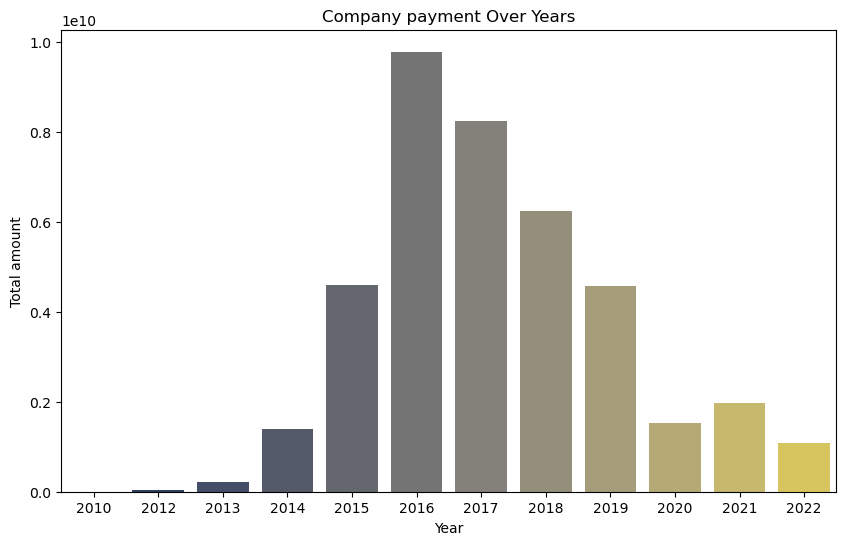

In [23]:
profit_by_year = df.groupby('Year')['Payement'].sum().reset_index()

# Plot the profit by year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Payement', data=profit_by_year, palette='cividis')
plt.title('Company payment Over Years')
plt.xlabel('Year')
plt.ylabel('Total amount')
plt.show()

How much the company could potentially lose if these payments are not made.

In [24]:
# Calculate the total payment difference for anomalies (which may be unpaid)
total_payment_difference = model_anomalies['Payment_Difference'].sum()

# Display the total payment difference (potential cost to the company)
print(f"Total payment difference (potential loss) due to anomalies: {total_payment_difference:.2f}")


Total payment difference (potential loss) due to anomalies: -640414293424.87


The significance of this potential loss is substantial, and it suggests that a detailed investigation into these anomalies is crucial. The company should prioritize:Reviewing the transactions associated with these anomalies to identify the root causes (e.g., accounting errors, fraud, system issues).

In [25]:
csv_file_path = './Data/Prepocessingg2_data.csv'

df.to_csv(csv_file_path, index=False)

print(f'DataFrame has been successfully written to {csv_file_path}')

DataFrame has been successfully written to ./Data/Prepocessingg2_data.csv


### 4. NOW WE TREAT THE COLUMN PrixAchat

Goal:
Focus on PrixAchat for Bon de livraison (delivery receipt) transactions.
Clean the data, handle missing or inconsistent values


Filter the dataset for "Bon de livraison" transactions

In [26]:
# Filter the data for "Bon de livraison" transaction type
bon_de_livraison_only = df[df['TypeEffet'] == 'Bon de livraison']


Check for missing values in PrixAchat

In [27]:
# Check for missing values in 'PrixAchat'
missing_values = bon_de_livraison_only['PrixAchat'].isnull().sum()
print(f"Missing PrixAchat values: {missing_values}")


Missing PrixAchat values: 0


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_9436\66485472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bon_de_livraison_only['Year'] = bon_de_livraison_only['Date'].dt.year


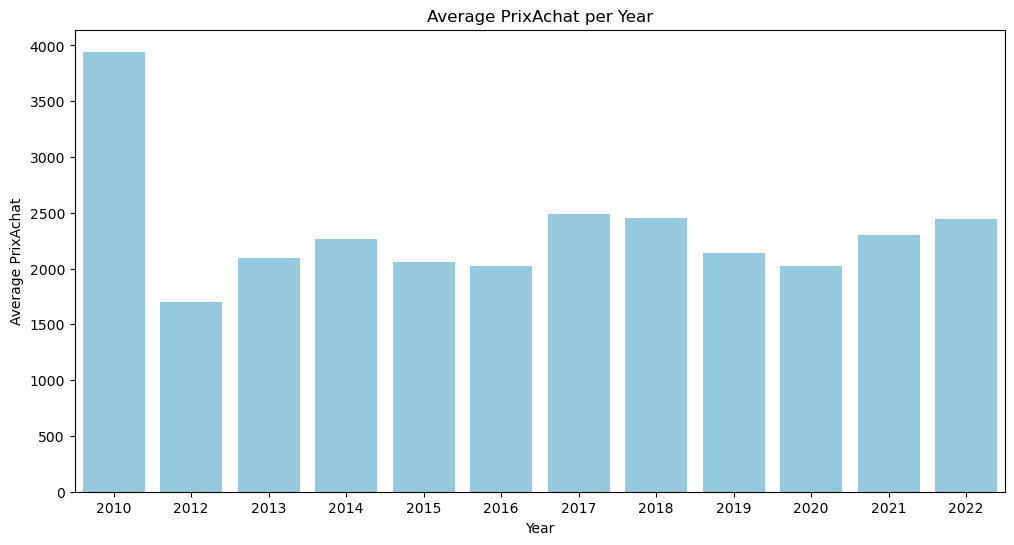

In [28]:
bon_de_livraison_only['Year'] = bon_de_livraison_only['Date'].dt.year

avg_price_per_year = bon_de_livraison_only.groupby('Year')['PrixAchat'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='PrixAchat', data=avg_price_per_year, color='skyblue')
plt.title('Average PrixAchat per Year')
plt.xlabel('Year')
plt.ylabel('Average PrixAchat')
plt.show()



detect outliers using the IQR method.


In [29]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = bon_de_livraison_only['PrixAchat'].quantile(0.25)
Q3 = bon_de_livraison_only['PrixAchat'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers based on IQR
bon_de_livraison_only['Is_Outlier_IQR'] = bon_de_livraison_only['PrixAchat'].apply(lambda x: 1 if x < lower_bound or x > upper_bound else 0)

# Display outliers
outliers_iqr = bon_de_livraison_only[bon_de_livraison_only['Is_Outlier_IQR'] == 1]
print(f"Number of outliers based on IQR: {len(outliers_iqr)}")
print(outliers_iqr[['CleEffet', 'Produit_Designation', 'PrixAchat']])


Number of outliers based on IQR: 21077
        CleEffet  Produit_Designation  PrixAchat
2190         562                  187     9000.0
2350         688                 1368     6800.0
2544         826                 1595    51500.0
2571         850                 1607    10500.0
2594         872                 1621    58000.0
...          ...                  ...        ...
260960     68339                 5347    56200.0
260968     68343                 6288     6750.0
260989     68345                 6772     9075.0
260990     68345                 2228    11000.0
260999     68352                 7280     8700.0

[21077 rows x 3 columns]


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_9436\829665936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bon_de_livraison_only['Is_Outlier_IQR'] = bon_de_livraison_only['PrixAchat'].apply(lambda x: 1 if x < lower_bound or x > upper_bound else 0)


In [30]:
# Calculate the percentage of anomalies
total_rows = len(bon_de_livraison_only)
outliers_count = len(outliers_iqr)
percentage_anomalies = (outliers_count / total_rows) * 100

print(f"Percentage of anomalies: {percentage_anomalies:.2f}%")


Percentage of anomalies: 9.45%


In [31]:
# Review a sample of the outliers
outliers_iqr.head()


,CleEffet,Date,TypeEffet,FamilleArticle,Reference Produit,NLot,Produit_Designation,Quantite,PrixAchat,PrixUnitaireTTC,...,Effet_Marge,MontantHT,Payement,Year,Sales,Payment_Difference,Z_Score,Is_Anomaly_ZScore,Is_Outlier,Is_Outlier_IQR
2190,562,2012-09-08,Bon de livraison,semence haricot,0115,CR1203,187,1.0,9000.0,11250.0,...,10698.88,10699.88,10699.88,2012,11250.0,-550.12,0.002673,0,1,1
2350,688,2012-09-11,Bon de livraison,chou-fleur hybride,0205,102134064,1368,1.0,6800.0,7000.0,...,599.80,6799.80,6799.80,2012,7000.0,-200.20,0.002674,0,1,1
2544,826,2012-09-13,Bon de livraison,matériel bovin,11000,no lot,1595,1.0,51500.0,70400.0,...,16400.00,70400.00,5000.00,2012,70400.0,-65400.00,0.002604,0,1,1
2571,850,2012-09-15,Bon de livraison,semence trefle,0118,0126-048,1607,8.0,10500.0,11750.0,...,93992.00,94000.00,58000.00,2012,94000.0,-36000.00,0.002636,0,1,1
2594,872,2012-09-15,Bon de livraison,matériel tronceneuses,30000,no lot,1621,1.0,58000.0,67200.0,...,67199.00,67200.00,0.00,2012,67200.0,-67200.00,0.002603,0,1,1


In [32]:
# Calculate the median of PrixAchat for non-anomalous data
median_prixachat = bon_de_livraison_only[bon_de_livraison_only['Is_Outlier_IQR'] == 0]['PrixAchat'].median()

# Replace outliers with the median value
bon_de_livraison_only['PrixAchat'] = bon_de_livraison_only.apply(
    lambda row: median_prixachat if row['Is_Outlier_IQR'] == 1 else row['PrixAchat'],
    axis=1
)

bon_de_livraison_only


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_9436\3189355799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bon_de_livraison_only['PrixAchat'] = bon_de_livraison_only.apply(


,CleEffet,Date,TypeEffet,FamilleArticle,Reference Produit,NLot,Produit_Designation,Quantite,PrixAchat,PrixUnitaireTTC,...,Effet_Marge,MontantHT,Payement,Year,Sales,Payment_Difference,Z_Score,Is_Anomaly_ZScore,Is_Outlier,Is_Outlier_IQR
623,340,2012-09-03,Bon de livraison,detail,DET,no lot,259,1.0,126.0,300.0,...,299.00,300.0,0.0,2012,300.0,-300.0,0.002674,0,1,0
624,341,2012-09-03,Bon de livraison,detail,DET,no lot,259,150.0,126.0,2266.5,...,0.00,150.0,0.0,2012,339975.0,-339975.0,0.002313,0,1,0
2166,540,2012-09-08,Bon de livraison,matériel tronceneuses,30000,no lot,465,1.0,180.0,250.0,...,249.00,250.0,250.0,2012,250.0,0.0,0.002674,0,1,0
2172,546,2012-09-08,Bon de livraison,detail,DET,no lot,259,6.0,126.0,250.0,...,1494.00,1500.0,1500.0,2012,1500.0,0.0,0.002674,0,1,0
2173,547,2012-09-08,Bon de livraison,produit insecticide,0305,111008,27,1.0,1200.0,500.0,...,-18498.00,1550.0,1500.0,2012,1550.0,-50.0,0.002674,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260996,68349,2022-07-28,Bon de livraison,produit insecticide,Unknown,210207,7385,2.0,750.0,1000.0,...,500.00,2000.0,0.0,2022,2000.0,-2000.0,0.002672,0,1,0
260997,68350,2022-07-28,Bon de livraison,produit fongicide,Unknown,37995,6074,1.0,4100.0,4900.0,...,808.51,4900.0,0.0,2022,4900.0,-4900.0,0.002669,0,1,0
260998,68351,2022-07-28,Bon de livraison,matériel bovin,11000,no lot,413,1.0,1750.0,3500.0,...,1750.00,3500.0,0.0,2022,3500.0,-3500.0,0.002670,0,1,0
260999,68352,2022-07-28,Bon de livraison,pastèque hybride,Unknown,TR072112050134,7280,3.0,500.0,9700.0,...,3000.00,29100.0,0.0,2022,29100.0,-29100.0,0.002643,0,1,1


In [33]:
# Drop the specified columns only if they exist in the DataFrame
columns_to_drop = ['Payment_Difference', 'Z_Score', 'Is_Anomaly_ZScore', 'Is_Outlier', 'Rate', 'Is_Outlier_IQR']

# Filter out any columns that are not present in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify the columns are dropped
print(df.columns)


Index(['CleEffet', 'Date', 'TypeEffet', 'FamilleArticle', 'Reference Produit',
       'NLot', 'Produit_Designation', 'Quantite', 'PrixAchat',
       'PrixUnitaireTTC', 'DetailEffet_Marge', 'Effet_Marge', 'MontantHT',
       'Payement', 'Year', 'Sales'],
      dtype='object')


### 5.we correct DetailEffet_Marge column by directly calculating it 

WHIXCH IS THE PROFIT PER PRODUCT

In [34]:
bon_de_livraison_only['DetailEffet_Marge']=(bon_de_livraison_only['PrixUnitaireTTC']-bon_de_livraison_only['PrixAchat'])*bon_de_livraison_only['Quantite']
bon_de_livraison_only

,CleEffet,Date,TypeEffet,FamilleArticle,Reference Produit,NLot,Produit_Designation,Quantite,PrixAchat,PrixUnitaireTTC,...,Effet_Marge,MontantHT,Payement,Year,Sales,Payment_Difference,Z_Score,Is_Anomaly_ZScore,Is_Outlier,Is_Outlier_IQR
623,340,2012-09-03,Bon de livraison,detail,DET,no lot,259,1.0,126.0,300.0,...,299.00,300.0,0.0,2012,300.0,-300.0,0.002674,0,1,0
624,341,2012-09-03,Bon de livraison,detail,DET,no lot,259,150.0,126.0,2266.5,...,0.00,150.0,0.0,2012,339975.0,-339975.0,0.002313,0,1,0
2166,540,2012-09-08,Bon de livraison,matériel tronceneuses,30000,no lot,465,1.0,180.0,250.0,...,249.00,250.0,250.0,2012,250.0,0.0,0.002674,0,1,0
2172,546,2012-09-08,Bon de livraison,detail,DET,no lot,259,6.0,126.0,250.0,...,1494.00,1500.0,1500.0,2012,1500.0,0.0,0.002674,0,1,0
2173,547,2012-09-08,Bon de livraison,produit insecticide,0305,111008,27,1.0,1200.0,500.0,...,-18498.00,1550.0,1500.0,2012,1550.0,-50.0,0.002674,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260996,68349,2022-07-28,Bon de livraison,produit insecticide,Unknown,210207,7385,2.0,750.0,1000.0,...,500.00,2000.0,0.0,2022,2000.0,-2000.0,0.002672,0,1,0
260997,68350,2022-07-28,Bon de livraison,produit fongicide,Unknown,37995,6074,1.0,4100.0,4900.0,...,808.51,4900.0,0.0,2022,4900.0,-4900.0,0.002669,0,1,0
260998,68351,2022-07-28,Bon de livraison,matériel bovin,11000,no lot,413,1.0,1750.0,3500.0,...,1750.00,3500.0,0.0,2022,3500.0,-3500.0,0.002670,0,1,0
260999,68352,2022-07-28,Bon de livraison,pastèque hybride,Unknown,TR072112050134,7280,3.0,500.0,9700.0,...,3000.00,29100.0,0.0,2022,29100.0,-29100.0,0.002643,0,1,1


### SAME FOR Effet_Marge

WHICH IS THE PROFIT PER EFFET

In [35]:
bon_de_livraison_only['Effet_Marge']=bon_de_livraison_only.groupby('CleEffet')['DetailEffet_Marge'].transform('sum')
bon_de_livraison_only

,CleEffet,Date,TypeEffet,FamilleArticle,Reference Produit,NLot,Produit_Designation,Quantite,PrixAchat,PrixUnitaireTTC,...,Effet_Marge,MontantHT,Payement,Year,Sales,Payment_Difference,Z_Score,Is_Anomaly_ZScore,Is_Outlier,Is_Outlier_IQR
623,340,2012-09-03,Bon de livraison,detail,DET,no lot,259,1.0,126.0,300.0,...,174.0,300.0,0.0,2012,300.0,-300.0,0.002674,0,1,0
624,341,2012-09-03,Bon de livraison,detail,DET,no lot,259,150.0,126.0,2266.5,...,321075.0,150.0,0.0,2012,339975.0,-339975.0,0.002313,0,1,0
2166,540,2012-09-08,Bon de livraison,matériel tronceneuses,30000,no lot,465,1.0,180.0,250.0,...,70.0,250.0,250.0,2012,250.0,0.0,0.002674,0,1,0
2172,546,2012-09-08,Bon de livraison,detail,DET,no lot,259,6.0,126.0,250.0,...,744.0,1500.0,1500.0,2012,1500.0,0.0,0.002674,0,1,0
2173,547,2012-09-08,Bon de livraison,produit insecticide,0305,111008,27,1.0,1200.0,500.0,...,-400.0,1550.0,1500.0,2012,1550.0,-50.0,0.002674,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260996,68349,2022-07-28,Bon de livraison,produit insecticide,Unknown,210207,7385,2.0,750.0,1000.0,...,500.0,2000.0,0.0,2022,2000.0,-2000.0,0.002672,0,1,0
260997,68350,2022-07-28,Bon de livraison,produit fongicide,Unknown,37995,6074,1.0,4100.0,4900.0,...,800.0,4900.0,0.0,2022,4900.0,-4900.0,0.002669,0,1,0
260998,68351,2022-07-28,Bon de livraison,matériel bovin,11000,no lot,413,1.0,1750.0,3500.0,...,1750.0,3500.0,0.0,2022,3500.0,-3500.0,0.002670,0,1,0
260999,68352,2022-07-28,Bon de livraison,pastèque hybride,Unknown,TR072112050134,7280,3.0,500.0,9700.0,...,27600.0,29100.0,0.0,2022,29100.0,-29100.0,0.002643,0,1,1


### now lets calculate the rate of profit and analyse it 

identify Products with Price Variations


In [36]:
unique_products = bon_de_livraison_only['Produit_Designation'].unique()
non_zero_variations = []

for product in unique_products:
    product_data = bon_de_livraison_only[bon_de_livraison_only['Produit_Designation'] == product]
    unique_prices = product_data['PrixAchat'].unique()
    variation = np.std(unique_prices)
    
    if variation != 0:
        non_zero_variations.append(product)


Calculate Rate of Profit

In [37]:
buying_selling_price = bon_de_livraison_only[['Date', 'Produit_Designation', 'PrixAchat', 'PrixUnitaireTTC']]
filtered_buying_selling_price_non_zero_variations = buying_selling_price[buying_selling_price['Produit_Designation'].isin(non_zero_variations)]

filtered_buying_selling_price_non_zero_variations['Rate_of_Profit'] = filtered_buying_selling_price_non_zero_variations.apply(
    lambda row: (row['PrixUnitaireTTC'] / row['PrixAchat']) - 1 if row['PrixAchat'] != 0 else (row['PrixUnitaireTTC'] / 0.1) - 1,
    axis=1
)


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_9436\2211619911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_buying_selling_price_non_zero_variations['Rate_of_Profit'] = filtered_buying_selling_price_non_zero_variations.apply(


Outlier Detection using IQR

In [38]:
# Calculate the IQR bounds
Q1 = filtered_buying_selling_price_non_zero_variations['Rate_of_Profit'].quantile(0.25)
Q3 = filtered_buying_selling_price_non_zero_variations['Rate_of_Profit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mark rows as outliers if they are outside the IQR bounds
filtered_buying_selling_price_non_zero_variations['Is_Outlier_IQR'] = filtered_buying_selling_price_non_zero_variations['Rate_of_Profit'].apply(
    lambda x: 1 if x < lower_bound or x > upper_bound else 0
)

# Count the number of outlier rows
num_outliers = filtered_buying_selling_price_non_zero_variations['Is_Outlier_IQR'].sum()

print(f'Number of outlier rows: {num_outliers}')


Number of outlier rows: 18750


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_9436\3578984392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_buying_selling_price_non_zero_variations['Is_Outlier_IQR'] = filtered_buying_selling_price_non_zero_variations['Rate_of_Profit'].apply(


we remove these rows 

In [39]:
# Remove the rows where 'Is_Outlier_IQR' is 1 (outliers)
filtered_buying_selling_price_non_zero_variations_cleaned = filtered_buying_selling_price_non_zero_variations[
    filtered_buying_selling_price_non_zero_variations['Is_Outlier_IQR'] == 0
]

# Verify the number of rows after removing outliers
print(f'Number of rows after removing outliers: {len(filtered_buying_selling_price_non_zero_variations_cleaned)}')


Number of rows after removing outliers: 118028


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


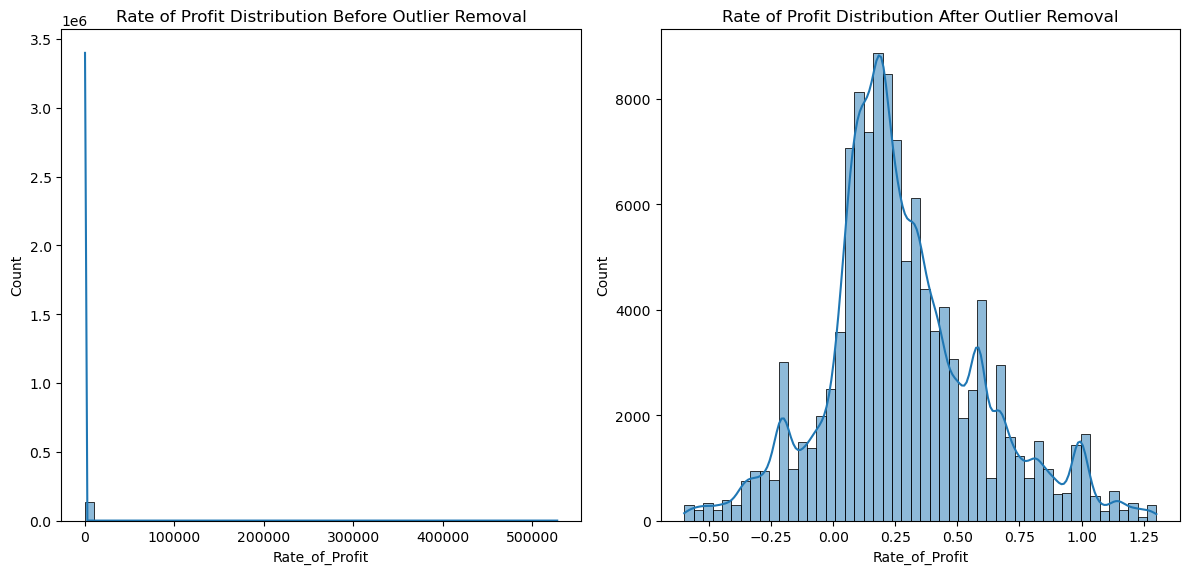

In [40]:
# Before outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(filtered_buying_selling_price_non_zero_variations['Rate_of_Profit'], kde=True, bins=50)
plt.title('Rate of Profit Distribution Before Outlier Removal')

# After outlier removal
plt.subplot(1, 2, 2)
sns.histplot(filtered_buying_selling_price_non_zero_variations_cleaned['Rate_of_Profit'], kde=True, bins=50)
plt.title('Rate of Profit Distribution After Outlier Removal')

plt.tight_layout()
plt.show()



In [41]:
# Specify the path where you want to save the CSV file
csv_file_path = './Data/Prepocessing2_data.csv'

# Use the to_csv method to write the DataFrame to a CSV file
bon_de_livraison_only.to_csv(csv_file_path, index=False)

print(f'DataFrame has been successfully written to {csv_file_path}')

DataFrame has been successfully written to ./Data/Prepocessing2_data.csv


# conclusion

we have improved the quality of our data, which will lead to more accurate and meaningful insights in future analyses. The transformation allows for better decision-making, as the cleaned data reflects more typical trends without being influenced by extreme values that could potentially lead to biased conclusions.